<h1><center>Lecture 21:<br>Part-of-Speech Tagging<br></center></h1><h2><center>Tuesday Mar 29 2022<br></center></h2>


<center><img src="https://miro.medium.com/max/1400/1*fRjvBbgzo90x0MZdXZT82A.png" width=800 height=800 /></center>

# Updates

## This week: Part-of-Speech Tagging
* Reading: J&M Intro, Secs 8.1, 8.2, 8.3
    * 8.1 is review of lexical categories
* Quiz 10 Due Friday
* HW 5 now on Canvas
    * Due Tues. 4/11
* Reminder: You must talk to me/email me about your final project topic by tonight.

### Questions, comments, concerns?

# Quiz 9 Review
## 1. Naïve Bayes classification is an example of unsupervised machine learning.

False

## 2. Given the following data, based on a Naïve Bayes classifier, what is the probability that "so many tears" belongs in the category "romance"?

Do not apply Laplace smoothing. Round your answer to the nearest fourth decimal place (e.g. 0.xxxx).


| Text     | Tag |
| ----------- | ----------- |
| really made me laugh     | comedy      |
| so many great quotes   | romance        |
| the ending had so many twists   | romance        |
| laughing with tears in my eyes     | comedy      |
| can't stop wiping tears from my eyes   | romance        |


$$P(\text{so many tears }|\text{ romance})=$$
$$P(\text{so | romance) } \times P(\text{many | romance)} \times P(\text{tears | romance)} \times  P(\text{romance)}$$

$$\frac{2}{17} \times \frac{2}{17} \times \frac{1}{17} \times \frac{17}{27} = 0.0005 $$ 

## 3. Given the following short movie reviews, each labeled with a genre, either comedy or action:


| Review     | Tag |
| ----------- | ----------- |
| fun, couple, love, love     | comedy      |
| fast, furious, shoot   | action       |
| couple, fly, fast, fun, fun   | comedy       |
| furious, shoot, shoot, fun     | action      |
| fly, fast, shoot, love   | action      |

and a new document D:

fast, couple, shoot, fly



compute the most likely class for D. Assume a naive Bayes classifier and use Laplace (add-1) smoothing for the likelihoods.

$$P(\text{fast, couple, shoot, fly }|\text{ comedy})=$$
$$P(\text{fast | comedy) } \times P(\text{couple | comedy)} \times P(\text{shoot | comedy)} \times P(\text{fly | comedy)} \times  P(\text{comedy)}$$

$$\frac{1 + 1}{9 + 20} \times \frac{2 + 1}{9 + 20} \times \frac{0 + 1}{9 + 20} \times \frac{1 + 1}{9 + 20} \times \frac{9 + 1}{20 + 20}$$ 

In [3]:
(2/29) * (3/29) * (1/29) * (2/29) * (10/40)

4.241595631722046e-06

$$P(\text{fast, couple, shoot, fly }|\text{ action})=$$
$$P(\text{fast | action) } \times P(\text{couple | action)} \times P(\text{shoot | action)} \times P(\text{fly | action)} \times  P(\text{action)}$$

$$\frac{2 + 1}{11 + 20} \times \frac{0 + 1}{11 + 20} \times \frac{4 + 1}{11 + 20} \times \frac{1 + 1}{11 + 20} \times \frac{11 + 1}{20 + 20}$$ 

In [4]:
(3/31) * (1/31) * (5/31) * (2/31) * (12/40) # Slightly higher!

9.745311692966375e-06

## 4. For which of the following NLP tasks might we utilize the Naïve Bayes algorithm? Choose all that apply.

* [x] sentiment analysis
* [x] spam detection
* [x] authorship attribution
* [x] machine translation

# Moving on... Part-of-Speech Tagging!
* The process of labeling the part of speech for each word in a text
    * Noun, verb, preposition, determiner, etc.
    * Check J&M Chp. 8 pgs. 2-4 for review of lexical categories

## Why would we need to do this in NLP?

### Example: Text-to-Speech
How would we expect Siri to pronounce _book_? <br>
Or _The book is on the counter_?

### Example: Text-to-Speech
How do you pronounce the word _refuse_? <br>
How about _lead_?

### How do we know which _refuse_ or _permit_ to use here?

They refuse to permit us to obtain the refuse permit.

## Disambiguation
* Many words are ambiguous!
* Not just in English

## Examples of _back_ with different pos:
* **adjective**: earnings growth took a _back_ seat <br>
* **noun**: a small building in the _back_ <br>
* **verb (pres)**: a clear majority of senators _back_ the bill <br>
* **verb (inf)**: Dave began to _back_ toward the door <br>
* **particle**: enable the country to buy _back_ debt <br>
* **adverb**: I was twenty-one _back_ then

What other examples can you think of?

## Open Class
* Words can easily be added (and frequently are)!
    * Nouns: sandwich, doomscrolling
    * Verbs: slaps, chillax
    * Adjectives: corny, basic

## Closed Class
* Fixed membership
* Function words
* Typically short, occur frequently, structural uses (what else does this describe in NLP)?
    * Determiners: this, the
    * Conjunctions: and, or
    * Pronouns: she, they
    * Prepositions: to, with
    * Particles: off, up
    * Modals: can, would

In [ ]:
import nltk
from nltk.corpus import stopwords

stopwords.words("english")

# There are many different tagsets
* Some built for a specific language
* Some more detailed than others

## Universal tagset (NLTK)
* Useful for most languages
* Not very detailed
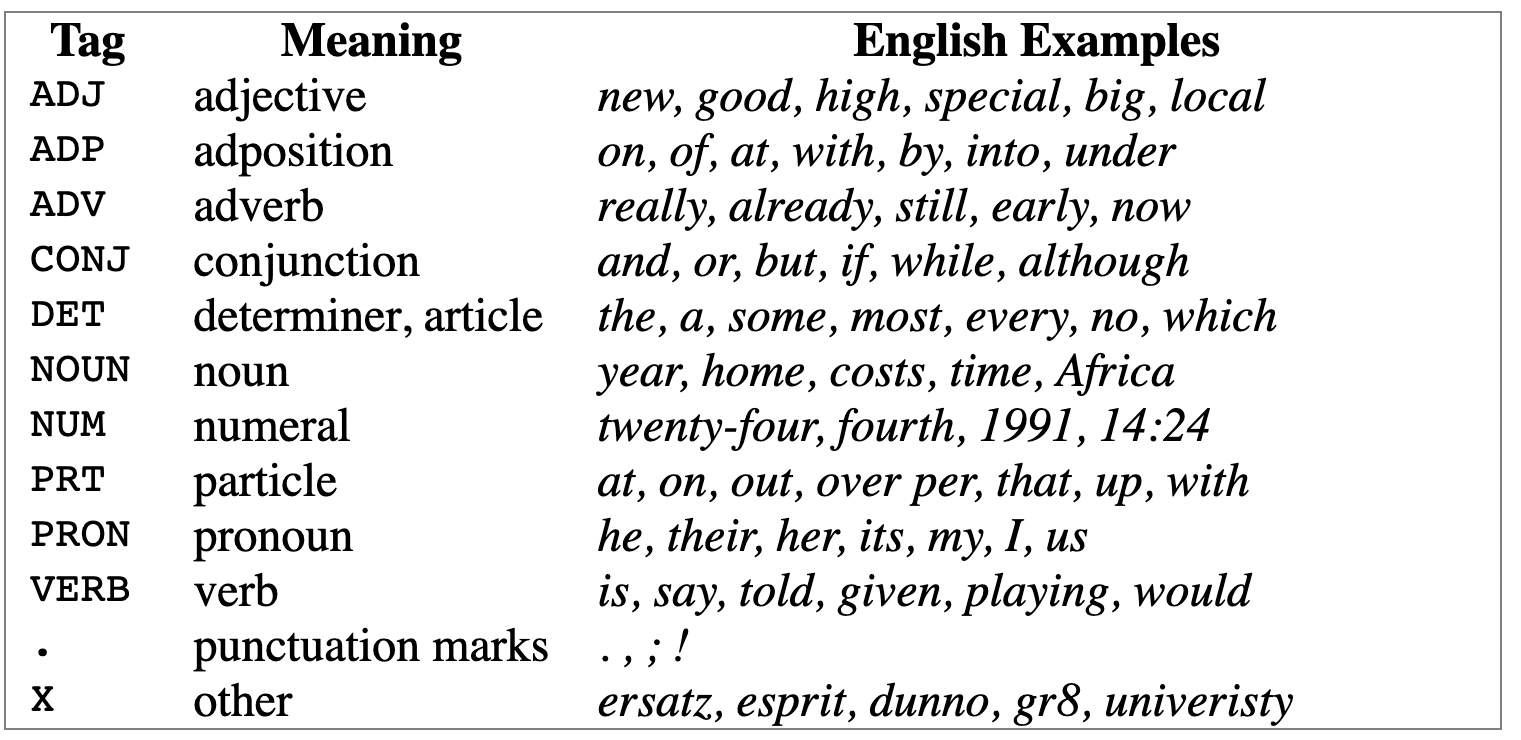

## Penn Treebank tagset
* Specific to English
* We'll return to the Penn Treebank corpus when we discuss Context Free Grammars

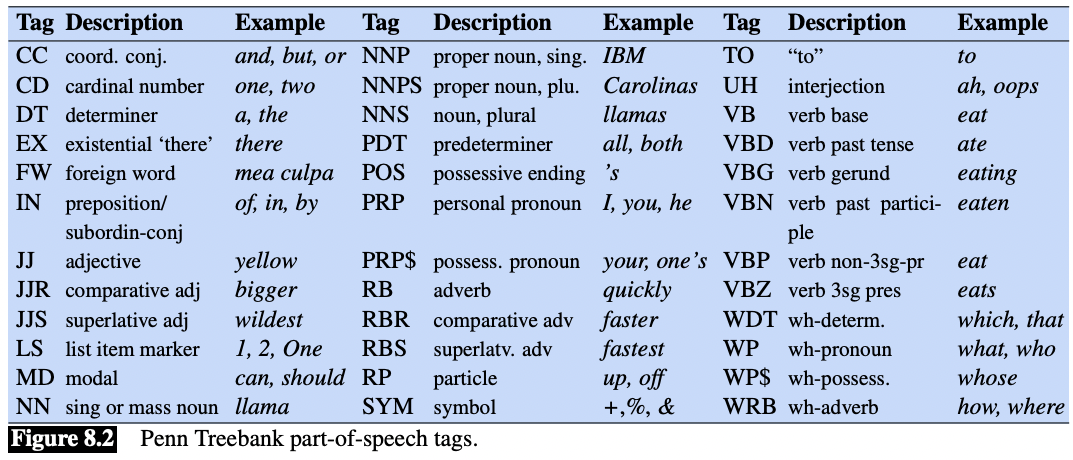

## And they can be even more specific...
* Nouns using Brown tagset
    * NN-NC citations
    * NN\$ possessives
    * NN-HL headlines
    * NN-TL titles

## NLTK has a built-in pos-tagger!

In [7]:
import nltk
# nltk.download('punkt') # If you are working in Google Colab
# nltk.download('averaged_perceptron_tagger') # If you are working in Google Colab
from nltk.tokenize import word_tokenize

In [ ]:
pencil = word_tokenize("My pencil ran out of lead")
dog = word_tokenize("I will lead my dog to the park")
print(pencil)


In [8]:
nltk.pos_tag(pencil) # Returns a list of tuples

[('My', 'PRP$'),
 ('pencil', 'NN'),
 ('ran', 'VBD'),
 ('out', 'IN'),
 ('of', 'IN'),
 ('lead', 'NN')]

In [9]:
nltk.pos_tag(dog)

[('I', 'PRP'),
 ('will', 'MD'),
 ('lead', 'VB'),
 ('my', 'PRP$'),
 ('dog', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('park', 'NN')]

### Your Turn:

Many words, like _ski_ and _race_, can be used as nouns or verbs with no difference in pronunciation. Can you think of others? 

Hint: think of a commonplace object and try to put the word _to_ before it to see if it can also be a verb, or think of an action and try to put _the_ before it to see if it can also be a noun. Now make up a sentence with both uses of this word, and run the POS-tagger on this sentence.

In [22]:
x = word_tokenize("I used the red pen to pen a letter to my friend")

In [23]:
nltk.pos_tag(x)

[('I', 'PRP'),
 ('used', 'VBD'),
 ('the', 'DT'),
 ('red', 'JJ'),
 ('pen', 'NN'),
 ('to', 'TO'),
 ('pen', 'VB'),
 ('a', 'DT'),
 ('letter', 'NN'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('friend', 'NN')]

## How do you think the tagger knows when to tag _pen_ as NN vs. VB?

### Mini game

Working with someone else, take turns to pick a word that can be either a noun or a verb (e.g. contest); the opponent has to predict which one is likely to be the most frequent in the Brown corpus; check the opponent's prediction, and tally the score over several turns.

### This works for languages other than English as well
* NLTK includes tagged texts for Chinese, Hindi, Portuguese, Spanish, Dutch and Catalan
* You can read the tagged words of any corpus that has already been tagged using `tagged_words()`

In [7]:
nltk.corpus.mac_morpho.tagged_words() # Brazilian Portuguese

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [8]:
nltk.corpus.indian.tagged_words() # 4 Indian languages: Bangla, Hindi, Marathi, and Telugu)

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

## How many words in English are ambiguous?
* We have looked at semantic ambiguity in Wordnet
* Let's check using the Brown corpus
* Predict: Do you expect more ambiguous words or unambigous words in a language?
    * What would we expect based on Principle of Least Effort or Zipf's Law?

In [12]:
from nltk.corpus import brown
brown_tagged = nltk.corpus.brown.tagged_words()

Use sorted() and set() to get a sorted list of tags used in the Brown corpus, removing duplicates.

In [29]:
set(sorted(brown_tagged))

{('fetid', 'JJ'),
 ('finger-post', 'NN'),
 ('Drexel', 'NP'),
 ('horse-chestnut', 'NN'),
 ('Large-package', 'NN-HL'),
 ('depressants', 'NNS'),
 ('Held', 'VBD-HL'),
 ('Pincian', 'JJ-TL'),
 ('inconsistency', 'NN'),
 ('Yale', 'NP'),
 ('here', 'RN'),
 ('salads', 'NNS'),
 ('California', 'NP'),
 ('76.7', 'CD'),
 ("Doesn't", 'DOZ*-TL'),
 ('Lifson', 'NP'),
 ("Burkes'", 'NPS$'),
 ('dished', 'VBD'),
 ('feminine', 'JJ'),
 ('underneath', 'IN'),
 ('deficiency', 'NN'),
 ('moneymaking', 'JJ'),
 ('singly', 'RB'),
 ('coughed', 'VBD'),
 ('kin', 'MD'),
 ('thundered', 'VBD'),
 ('exploration', 'NN-HL'),
 ('sari', 'NN'),
 ('considered', 'VBD'),
 ('Survivors', 'NNS'),
 ('Gomez', 'NP'),
 ('apologized', 'VBN'),
 ('tasty', 'JJ'),
 ('gaming-card', 'NN'),
 ('armistice', 'NN'),
 ('breakfast-table', 'NN'),
 ('Manchester', 'NP'),
 ('rested', 'VBN'),
 ('inlet', 'NN'),
 ('turning', 'NN'),
 ('four-element', 'JJ'),
 ('twise', 'RB'),
 ('sustained', 'VBD'),
 ('Jai', 'NP-TL'),
 ('Grzesiak', 'NP'),
 ('Data', 'NNS'),
 ('viewe

In [13]:
len(brown_tagged)

1161192

In [17]:
print(set(brown_tagged))

{('finger-post', 'NN'), ('fetid', 'JJ'), ('Drexel', 'NP'), ('horse-chestnut', 'NN'), ('Large-package', 'NN-HL'), ('depressants', 'NNS'), ('Held', 'VBD-HL'), ('Pincian', 'JJ-TL'), ('inconsistency', 'NN'), ('Yale', 'NP'), ('here', 'RN'), ('California', 'NP'), ('underneath', 'IN'), ("Doesn't", 'DOZ*-TL'), ('feminine', 'JJ'), ("Burkes'", 'NPS$'), ('76.7', 'CD'), ('Lifson', 'NP'), ('dished', 'VBD'), ('deficiency', 'NN'), ('plaids', 'NNS'), ('moneymaking', 'JJ'), ('singly', 'RB'), ('coughed', 'VBD'), ('kin', 'MD'), ('thundered', 'VBD'), ('exploration', 'NN-HL'), ('sari', 'NN'), ('considered', 'VBD'), ('Survivors', 'NNS'), ('Gomez', 'NP'), ('apologized', 'VBN'), ('tasty', 'JJ'), ('gaming-card', 'NN'), ('rested', 'VBN'), ('turning', 'NN'), ('armistice', 'NN'), ('Manchester', 'NP'), ('inlet', 'NN'), ('twise', 'RB'), ('four-element', 'JJ'), ('breakfast-table', 'NN'), ('sustained', 'VBD'), ('Jai', 'NP-TL'), ('Grzesiak', 'NP'), ('Data', 'NNS'), ('denominationally', 'RB'), ('Dominion', 'NN-TL'), ('

In [16]:
len(set(brown_tagged))/len(brown_tagged)

0.05764679742884898

In [10]:
from nltk.corpus import brown
brown_tagged = nltk.corpus.brown.tagged_words()
print(brown_tagged[:20])

[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS')]


In [4]:
## Lydia


for tagged_sent in brown.tagged_sents():
  for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(tagged_sent):
    if (w1.lower() == "in" and t2 == "DET" and t3.startswith("NN")):
      print(w1, w2, w3)

In [10]:
brown_tagged = nltk.corpus.brown.tagged_words(tagset = "universal") # Let's simplify with the universal tagset

In [11]:
print(brown_tagged[:20])

[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP')]


In [30]:
md = [word.lower() for word,tag in brown_tagged if tag == "MD"]
print(sorted(set(md)))

["c'n", 'can', 'colde', 'could', 'dare', 'kin', 'maht', 'mai', 'may', 'maye', 'mayst', 'might', 'must', 'need', 'ought', 'shall', 'should', 'shuld', 'shulde', 'wil', 'will', 'wilt', 'wod', 'wold', 'wolde', 'would']


## Let's return to conditional frequency distributions
* We can use these to look at useful information here
* Instead of getting the number of occurences of a word generally...
* We can now look at the number of occurences of a word based on PoS

#### First, using a regular FreqDist, what is the most common PoS tag in the Brown corpus?

In [39]:
from nltk import FreqDist
regFreqDist = FreqDist(tag for (word, tag) in brown_tagged if word.isalpha())
regFreqDist.most_common()

[('NN', 149549),
 ('IN', 120405),
 ('AT', 97957),
 ('JJ', 60646),
 ('NNS', 53948),
 ('CC', 37633),
 ('RB', 36087),
 ('VB', 33637),
 ('NP', 30587),
 ('VBN', 29138),
 ('VBD', 26143),
 ('CS', 22136),
 ('PPS', 18253),
 ('VBG', 17750),
 ('PP$', 16871),
 ('TO', 14917),
 ('PPSS', 13796),
 ('NN-TL', 12654),
 ('MD', 12430),
 ('PPO', 11133),
 ('BEZ', 10066),
 ('BEDZ', 9806),
 ('AP', 9520),
 ('DT', 8956),
 ('QL', 8731),
 ('VBZ', 7367),
 ('CD', 7066),
 ('BE', 6360),
 ('RP', 6008),
 ('WDT', 5538),
 ('HVD', 4895),
 ('*', 4603),
 ('WRB', 4509),
 ('BER', 4379),
 ('JJ-TL', 4018),
 ('HV', 3927),
 ('WPS', 3924),
 ('NP-TL', 3731),
 ('BED', 3282),
 ('ABN', 3010),
 ('DTI', 2921),
 ('PN', 2565),
 ('BEN', 2470),
 ('DTS', 2435),
 ('HVZ', 2433),
 ('NNS-TL', 2196),
 ('EX', 2164),
 ('JJR', 1948),
 ('OD', 1742),
 ('NR', 1561),
 ('IN-TL', 1455),
 ('NN-HL', 1428),
 ('DO', 1353),
 ('NPS', 1240),
 ('PPL', 1233),
 ('RBR', 1182),
 ('DOD', 1047),
 ('JJT', 996),
 ('AT-TL', 746),
 ('ABX', 730),
 ('BEG', 684),
 ('NNS-HL', 5

In [40]:
data = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_tagged if word.isalpha())
sorted(data.conditions())

['a',
 'aa',
 'aaa',
 'aaawww',
 'aah',
 'aaron',
 'ab',
 'aback',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abaringe',
 'abasement',
 'abated',
 'abatuno',
 'abbas',
 'abbe',
 'abberations',
 'abbey',
 'abbot',
 'abbott',
 'abbreviated',
 'abbreviation',
 'abbreviations',
 'abc',
 'abdallah',
 'abdomen',
 'abdominal',
 'abdominis',
 'abduction',
 'abe',
 'abed',
 'abel',
 'abell',
 'abelson',
 'aber',
 'abernathy',
 'abernathys',
 'aberrant',
 'aberration',
 'aberrations',
 'abetted',
 'abeyance',
 'abhorred',
 'abhorrent',
 'abide',
 'abides',
 'abiding',
 'abigail',
 'abilene',
 'abilities',
 'ability',
 'abject',
 'abjection',
 'abjectly',
 'ablard',
 'ablated',
 'ablation',
 'ablaze',
 'able',
 'abler',
 'ably',
 'abner',
 'abnormal',
 'abnormalities',
 'abnormally',
 'abo',
 'aboard',
 'abode',
 'abolish',
 'abolished',
 'abolition',
 'abolitionist',
 'abolitionists',
 'aboriginal',
 'aborigine',
 'aborigines',
 'abortion',
 'abortions',
 'abortive',
 'abound',
 

In [42]:
data["back"]

FreqDist({'RB': 730, 'NN': 177, 'JJ': 27, 'VB': 25, 'RB-HL': 2, 'RB-TL': 2, 'JJ-TL': 2, 'NN-HL': 1})

#### Your turn: Search the brown tagged corpus for a word that you suspect to be ambiguous.

In [20]:
ambig = []
for word in sorted(data.conditions()):
    if len(data[word]) > 1:
        tags = [tag for (tag, _) in data[word].most_common()]
        ambig.append(word)
        #print(word, ' '.join(tags))

In [25]:
len(sorted(data.conditions()))/len(ambig)

12.240340736233648

In [22]:
len(ambig) # What's more frequent: ambiguous or unambigous words?

3287

In [24]:
#print(ambig)

### We can also use concordance to look at context

In [43]:
nltk.app.concordance() # This will open an interactive window

### Why is concordance, or context, useful for tagging?
* Remember the function `text.similar()`?

In [2]:
#nltk.download('gutenberg') # If you are working in Google Colab
#from nltk.book import *
text1.similar('ship')

whale boat sea world captain way head time other man crew pequod line
deck body fishery air side water voyage


# POS tagging performance
* POS-tagging is more accurate than other NLP tasks
* Most taggers accuracy ~97%
    * Same as manual human tagging for English

## Why?

* Most words are unambiguous!
* However... ambigous words appear very frequently
    * Ex: back, that, set, down

## Ambiguous words in pos-tagging
* Which of these is more likely?
    * refúse: _I absolutely refuse to do that_
    * réfuse: _The amount of refuse is overbearing_
* Disambiguation isn't horribly difficult!
    * Each tag is not equally likely

### Most Frequent Class Baseline (93%): Always compare a classifier against a baseline at least as good as the most frequent class baseline (assigning each token to the class it occurred in most often in the training set).

* What this means: Even if we just assume all words get their most likely tag, we'll be correct 93% of the time.

# Named Entity Tagging
**Named entity**: anything that can be referred to with a proper name
* Four major categories:

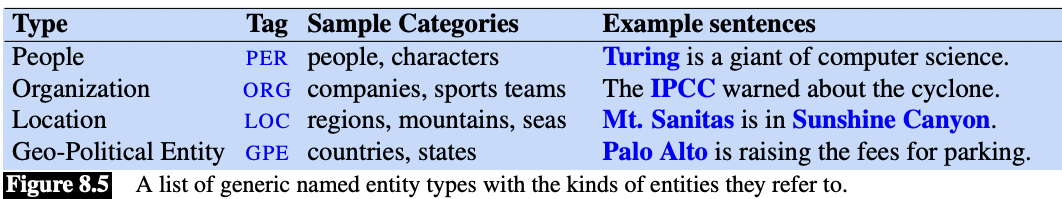

* But also other entities that may be specific to a task
    * Currency
    * Product names
    * Etc.

## For what kinds of NLP tasks do we need to know about named entities?

## Sentiment analysis
* How do consumers feel about products?

## Question answering
* How can we identify the specific entities need to pull information for an answer?
* We can't just use regular expressions - why not?


<center><img src="https://editor.analyticsvidhya.com/uploads/19617Intro%20image.jpg" width=800 height=800 /></center>

# Thursday: More on POS-tagging and NER!
   * How does a tagger _know_?!